In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Import the data file.<br>Some cleaning has already been done in Notepad and Excel.<br>Excel does not play nice with unicode datetime. CHrist

In [2]:
path_to_file = 'C:\Users\Administrator\Documents\Python Scripts\examplepark.csv'
data = pd.read_csv(path_to_file)

In [3]:
data['Time'] = ((pd.to_numeric(data['Time'].str.slice(0,2)))*60)+(pd.to_numeric(data['Time'].str.slice(3,5)))+((pd.to_numeric(data['Time'].str.slice(6,8)))/60)
data['Date'] = pd.to_datetime(data['Date'],errors='coerce', format='%d-%m-%Y')
data['Age_Cat'] = pd.to_numeric(data['Age_Cat'].str.slice(2,4),errors='coerce', downcast='signed')
data['Age_Grade'] = pd.to_numeric(data['Age_Grade'].str.slice(0,5),errors='coerce')
data.head(10)

,Date,Pos,Name,Time,Age_Cat,Age_Grade,Gender,Gen_Pos,Club,Note,Total_Runs,Run_No.
0,2012-11-10,1,Michael MCSWIGGAN,18.316667,35.0,73.43,M,1.0,Portmarnock Athletic Club,First Timer!,29.0,1
1,2012-11-10,2,Alan FOLEY,18.433333,30.0,71.16,M,2.0,Raheny Shamrock AC,First Timer!,99.0,1
2,2012-11-10,3,Matt SHIELDS,18.533333,55.0,85.07,M,3.0,North Belfast Harriers,First Timer!,274.0,1
3,2012-11-10,4,David GARGAN,18.650000,40.0,73.73,M,4.0,Raheny Shamrock AC,First Timer!,107.0,1
4,2012-11-10,5,Paul SINTON-HEWITT,18.900000,50.0,79.28,M,5.0,Ranelagh Harriers,First Timer!,369.0,1
5,2012-11-10,6,John Gerard MURPHY,20.250000,40.0,68.97,M,6.0,North Belfast Harriers,First Timer!,342.0,1
6,2012-11-10,7,Conor FITZPATRICK,20.283333,20.0,64.26,M,7.0,Portmarnock Athletic Club,First Timer!,40.0,1
7,2012-11-10,8,Rachael BECK,20.450000,40.0,76.37,F,1.0,Fingal Triathlon Club,First Timer!,9.0,1
8,2012-11-10,9,Des HUSIN,20.533333,45.0,69.07,M,8.0,NaN,First Timer!,296.0,1
9,2012-11-10,10,John COLEMAN,20.816667,30.0,63.01,M,9.0,NaN,First Timer!,87.0,1


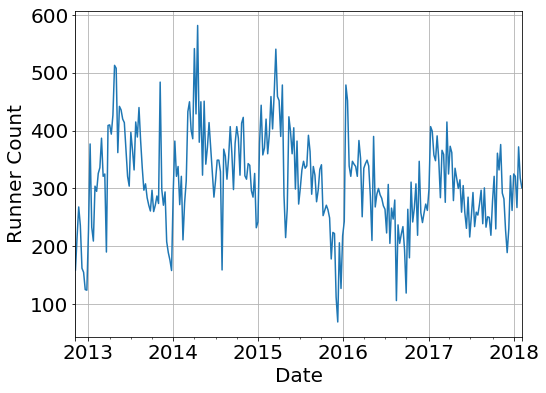

In [4]:
ax = data.groupby('Date').count()['Pos'].plot.line(figsize=(8, 6), fontsize=20)
ax.set_xlabel("Date", fontsize=20)
ax.set_ylabel("Runner Count", fontsize=20)
ax.grid('on', which='major', axis='x')
ax.grid('on', which='major', axis='y')

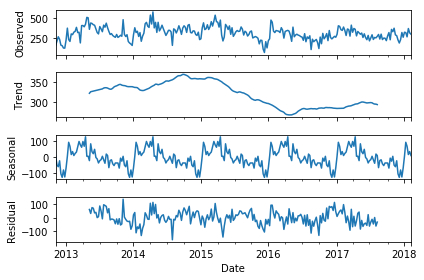

In [16]:
result = seasonal_decompose(data.groupby('Date').count()['Pos'],\
                            model='additive',freq=52)
result.plot()
plt.show()

In [48]:
# count defo dropped across 2015 from ~400 to ~300
# residual is fairly noisy, don't think there's anything to say about it.

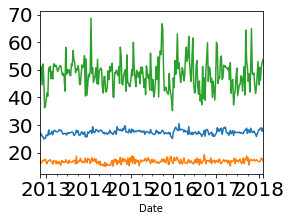

In [17]:
data.groupby('Date').mean()['Time'].plot.line(figsize=(4, 3), fontsize=20)
data.groupby('Date').min()['Time'].plot.line()
data.groupby('Date').max()['Time'].plot.line()

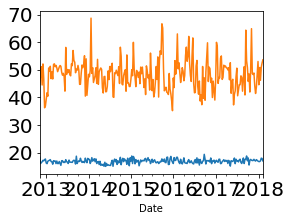

In [18]:
data.groupby('Date').min()['Time'].plot.line(figsize=(4, 3), fontsize=20)
data.groupby('Date').max()['Time'].plot.line()

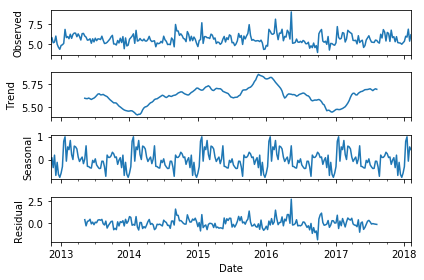

In [24]:
result = seasonal_decompose(data.groupby('Date').std()['Time'],\
                            model='additive',freq=52)
result.plot()
plt.show()

# not really anything interesting in the Min Mean or Max Times

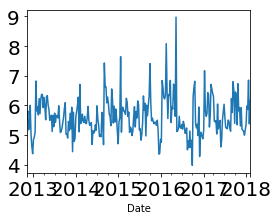

In [23]:
data.groupby('Date').std()['Time'].plot.line(figsize=(4, 3), fontsize=20)

In [25]:
df3 = data.dropna(subset=['Age_Grade'])
#df3['Age_Grade'].dropna()
df3['Rounded_Age_Grade'] = df3['Age_Grade'].apply(lambda x: x//2)
df3['Rounded_Age_Grade'] = df3['Rounded_Age_Grade'].apply(lambda x: int(x*2))

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [26]:
df3.head(20)

,Date,Pos,Name,Time,Age_Cat,Age_Grade,Gender,Gen_Pos,Club,Note,Total_Runs,Run_No.,Rounded_Age_Grade
0,2012-11-10,1,Michael MCSWIGGAN,18.316667,35.0,73.43,M,1.0,Portmarnock Athletic Club,First Timer!,29.0,1,72
1,2012-11-10,2,Alan FOLEY,18.433333,30.0,71.16,M,2.0,Raheny Shamrock AC,First Timer!,99.0,1,70
2,2012-11-10,3,Matt SHIELDS,18.533333,55.0,85.07,M,3.0,North Belfast Harriers,First Timer!,274.0,1,84
3,2012-11-10,4,David GARGAN,18.650000,40.0,73.73,M,4.0,Raheny Shamrock AC,First Timer!,107.0,1,72
4,2012-11-10,5,Paul SINTON-HEWITT,18.900000,50.0,79.28,M,5.0,Ranelagh Harriers,First Timer!,369.0,1,78
5,2012-11-10,6,John Gerard MURPHY,20.250000,40.0,68.97,M,6.0,North Belfast Harriers,First Timer!,342.0,1,68
6,2012-11-10,7,Conor FITZPATRICK,20.283333,20.0,64.26,M,7.0,Portmarnock Athletic Club,First Timer!,40.0,1,64
7,2012-11-10,8,Rachael BECK,20.450000,40.0,76.37,F,1.0,Fingal Triathlon Club,First Timer!,9.0,1,76
8,2012-11-10,9,Des HUSIN,20.533333,45.0,69.07,M,8.0,NaN,First Timer!,296.0,1,68
9,2012-11-10,10,John COLEMAN,20.816667,30.0,63.01,M,9.0,NaN,First Timer!,87.0,1,62


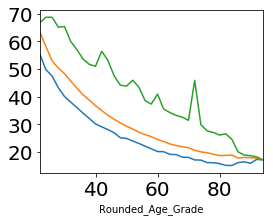

In [27]:
df3.groupby('Rounded_Age_Grade').min()['Time'].plot.line(figsize=(4, 3), fontsize=20)
df3.groupby('Rounded_Age_Grade').mean()['Time'].plot.line(figsize=(4, 3), fontsize=20)
df3.groupby('Rounded_Age_Grade').max()['Time'].plot.line(figsize=(4, 3), fontsize=20)

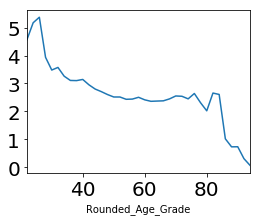

In [28]:
df3.groupby('Rounded_Age_Grade').std()['Time'].plot.line(figsize=(4, 3), fontsize=20)

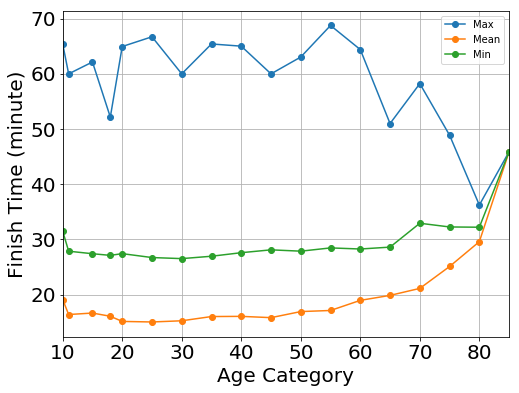

In [29]:
ax = data.groupby('Age_Cat').max()['Time'].plot.line(marker='o', figsize=(8, 6), fontsize=20)
ax = data.groupby('Age_Cat').min()['Time'].plot.line(marker='o', figsize=(8, 6), fontsize=20)
ax = data.groupby('Age_Cat').mean()['Time'].plot.line(marker='o', figsize=(8, 6), fontsize=20)
ax.legend(['Max','Mean','Min'])
ax.set_xlabel("Age Category", fontsize=20)
ax.set_ylabel("Finish Time (minute)", fontsize=20)
ax.grid('on', which='major', axis='x')
ax.grid('on', which='major', axis='y')

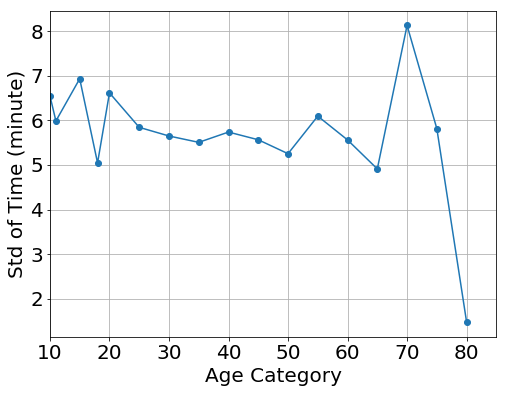

In [31]:
ax = data.groupby('Age_Cat').std()['Time'].plot.line(marker='o', figsize=(8, 6), fontsize=20)
ax.set_xlabel("Age Category", fontsize=20)
ax.set_ylabel("Std of Time (minute)", fontsize=20)
ax.grid('on', which='major', axis='x')
ax.grid('on', which='major', axis='y')

In [32]:
x = data.groupby('Date').count()['Pos']
ymax = data.groupby('Date').max()['Time']
ymean = data.groupby('Date').mean()['Time']
ymin = data.groupby('Date').min()['Time']

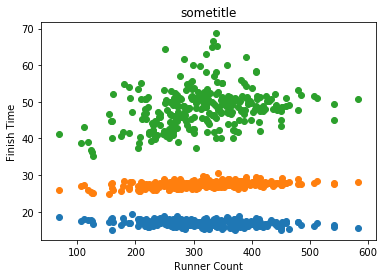

In [33]:
plt.scatter(x,ymin)
plt.scatter(x,ymean)
plt.scatter(x,ymax)
plt.title('sometitle')
plt.xlabel('Runner Count')
plt.ylabel('Finish Time')
plt.show()

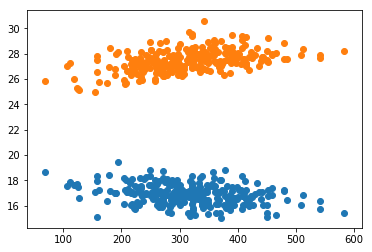

In [34]:
plt.scatter(x,ymin)
plt.scatter(x,ymean)
plt.show()

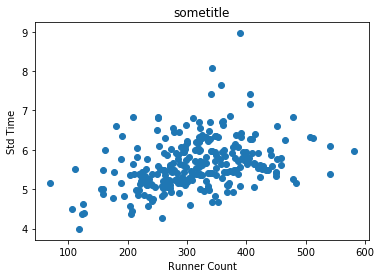

In [35]:
ystd = data.groupby('Date').std()['Time']
plt.scatter(x,ystd)
plt.title('sometitle')
plt.xlabel('Runner Count')
plt.ylabel('Std Time')
plt.show()

In [36]:
dft = data.groupby(['Date','Gender']).count()['Pos']
dft = dft.unstack()
dft['Ratio'] = dft['M']/dft['F']
dft['Date'] = dft.index
dft.head()

Gender,F,M,Ratio,Date
Date,,,,
2012-11-10,81,69,0.851852,2012-11-10
2012-11-17,85,117,1.376471,2012-11-17
2012-11-24,122,131,1.073770,2012-11-24
2012-12-01,90,132,1.466667,2012-12-01
2012-12-08,57,92,1.614035,2012-12-08


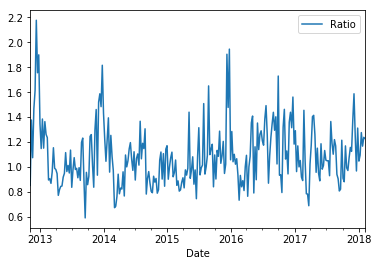

In [37]:
dft.plot(x='Date',y='Ratio')

In [38]:
series = dft['Ratio']
series.head()

Date
2012-11-10    0.851852
2012-11-17    1.376471
2012-11-24    1.073770
2012-12-01    1.466667
2012-12-08    1.614035
Name: Ratio, dtype: float64

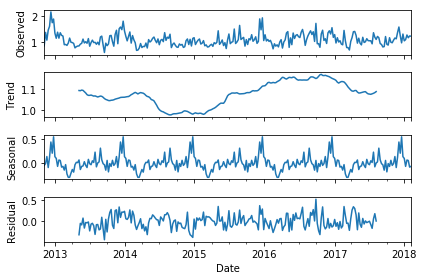

In [39]:
result = seasonal_decompose(series,\
                            model='additive',freq=52)
result.plot()
plt.show()

In [ ]:
# the seasonality is kind of expected when we consider the weather data.
# the ratio of men to women goes up the colder and rainier it is

In [40]:
dft = data.groupby(['Age_Cat','Gender']).count()['Pos']
dft = dft.unstack()
dft['Ratio'] = dft['M']/dft['F']
dft['Age_Cat'] = dft.index
dft.head()

Gender,F,M,Ratio,Age_Cat
Age_Cat,,,,
10.0,468.0,614.0,1.311966,10.0
11.0,1069.0,1599.0,1.495790,11.0
15.0,900.0,996.0,1.106667,15.0
18.0,352.0,229.0,0.650568,18.0
20.0,1006.0,635.0,0.631213,20.0


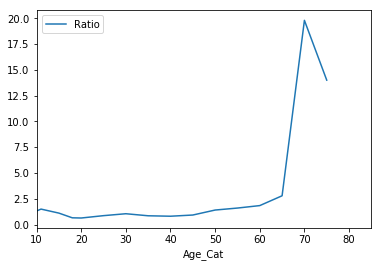

In [41]:
dft.plot(x='Age_Cat',y='Ratio')

In [42]:
dft = df3.groupby(['Rounded_Age_Grade','Gender']).count()['Pos']
dft = dft.unstack()
dft['Ratio'] = dft['M']/dft['F']
dft['Rounded_Age_Grade'] = dft.index
dft.head()

Gender,F,M,Ratio,Rounded_Age_Grade
Rounded_Age_Grade,,,,
22,4.0,1.0,0.250000,22
24,17.0,16.0,0.941176,24
26,15.0,23.0,1.533333,26
28,57.0,29.0,0.508772,28
30,125.0,48.0,0.384000,30


C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\transforms.py:661: RuntimeWarning: invalid value encountered in absolute
  inside = ((abs(dx0 + dx1) + abs(dy0 + dy1)) == 0)


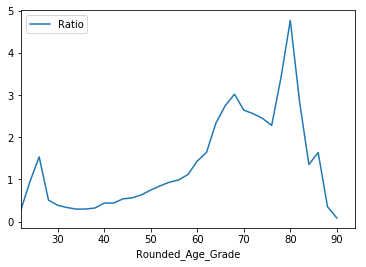

In [43]:
dft.plot(x='Rounded_Age_Grade',y='Ratio')

In [45]:
dft = data.groupby(['Date','Gender']).count()['Pos']
dft = dft.unstack()
dft['Ratio'] = dft['M']/dft['F']
dft['Count'] = dft['M']+dft['F']
dft.head()

Gender,F,M,Ratio,Count
Date,,,,
2012-11-10,81,69,0.851852,150
2012-11-17,85,117,1.376471,202
2012-11-24,122,131,1.073770,253
2012-12-01,90,132,1.466667,222
2012-12-08,57,92,1.614035,149


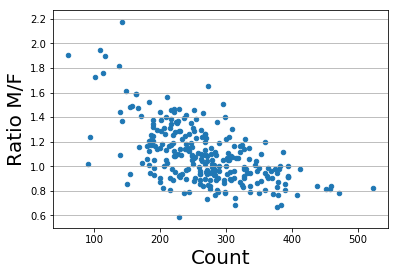

In [46]:
ax = dft.plot.scatter(x='Count',y='Ratio')
ax.set_xlabel("Count", fontsize=20)
ax.set_ylabel("Ratio M/F", fontsize=20)
#ax.grid('on', which='major', axis='x')
ax.grid('on', which='major', axis='y')

In [47]:
## and the fact that when few people come out the ratio of men to women goes up.
## and we already know the count is seasonal so since count and the ratio are 
## correlated we expect some seasonality in the ratio.